# Consolidated Fund - Capital Account

In [ ]:
# Modeling

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.model_selection import train_test_split


In [5]:
df_org = pd.read_excel('merged_dataset.xlsx')  # Load your data here

In [6]:
RAW_coulmns= 16

In [7]:
df_org.head()

,YEAR,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,...,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTAL_PUBLIC_DEBT_Receipts (B+C),TOTAL_CAPITAL_ACCOUNT_RECEIPTS (R+D+E),TOTAL_CAPITAL_EXPENDITURE_OUTSIDE_THE_REVENUE_ACCOUNT (G+H+I+J),TOTAL_PUBLIC_DEBT_Expenditures (K+L),TOTAL_LOANS_AND_ADVANCES (M+N+O+P),TOTALCAPITAL_EXPENDITURE (T+U+V)
0,1998-01-01,402835.71,9711.01,11559.92,5000,247314.97,11543.39,1050.55,15263.37,310.41,...,134.06,4878.84,31225.13,3.38,412546.72,429106.64,28167.72,359079.96,36241.41,423489.09
1,1999-01-01,593319.14,8329.83,13337.19,10000,279672.40,13564.50,1147.95,15625.54,327.30,...,165.05,5386.06,19192.05,2.18,601648.97,624986.16,30665.29,360893.44,24745.34,416304.07
2,2000-01-01,433331.56,8468.03,15839.00,10000,309448.97,19334.24,1069.56,13426.47,329.32,...,210.23,3801.04,22756.62,2.14,441799.59,467638.59,34159.59,354767.13,26770.03,415696.75
3,2001-01-01,363959.53,10763.35,17488.68,12000,292856.88,21706.77,952.78,17620.34,367.40,...,138.43,3329.10,22863.49,2.94,374722.88,404211.56,40647.29,285150.44,26333.96,352131.69
4,2002-01-01,423278.61,11183.82,20080.00,12000,314156.90,23199.91,1072.67,17683.52,326.60,...,242.75,2520.34,28767.90,5.12,434462.43,466542.43,42282.70,321154.89,31536.11,394973.70


In [8]:
# Keep only the first 11 columns (0-indexed, so 0 to 10)
df = df_org.iloc[:, :RAW_coulmns]
df.head()

,YEAR,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
0,1998-01-01,402835.71,9711.01,11559.92,5000,247314.97,11543.39,1050.55,15263.37,310.41,351422.43,7657.53,134.06,4878.84,31225.13,3.38
1,1999-01-01,593319.14,8329.83,13337.19,10000,279672.40,13564.50,1147.95,15625.54,327.30,352737.85,8155.59,165.05,5386.06,19192.05,2.18
2,2000-01-01,433331.56,8468.03,15839.00,10000,309448.97,19334.24,1069.56,13426.47,329.32,345593.76,9173.37,210.23,3801.04,22756.62,2.14
3,2001-01-01,363959.53,10763.35,17488.68,12000,292856.88,21706.77,952.78,17620.34,367.40,275552.19,9598.25,138.43,3329.10,22863.49,2.94
4,2002-01-01,423278.61,11183.82,20080.00,12000,314156.90,23199.91,1072.67,17683.52,326.60,310591.43,10563.46,242.75,2520.34,28767.90,5.12


In [9]:
# Convert the 'Year' column to datetime
# Convert the 'Year' column to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'])


In [10]:
import plotly.express as px

In [11]:
# Melt the DataFrame to long format
melted_df = df.melt(id_vars=['YEAR'], var_name='Type', value_name='Amount')

In [12]:
# Create the interactive plot
fig = px.line(melted_df, x='YEAR', y='Amount', color='Type', title='Receipts and Expenditures Over the Years')
# Update the layout to position the legend at the bottom
fig.update_layout(legend_title_text='Rgions', legend=dict(orientation="h", yanchor="bottom", y=-2, xanchor="center", x=0.5))

# Show the plot
fig.show()

In [13]:
# df.reset_index(drop=True, inplace=True)

In [14]:
# Normalize receipts and expenditures
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:].values)  # Normalize all columns except Year


In [15]:
# df.iloc[:, 1:] # jusct to check if year is dropped or not

In [16]:
# Prepare data sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [17]:
# Set sequence length (e.g., number of past years to consider)
seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

In [18]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# RNN model

In [19]:
# Build the RNN model
model_RNN = Sequential()
model_RNN.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape with Input layer
model_RNN.add(SimpleRNN(50, activation='relu'))
model_RNN.add(Dense(y_train.shape[1]))  # Output layer for each region's receipts/expenditures
model_RNN.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model
model_RNN.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1425
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1299 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0615 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

In [21]:
# Make predictions
predictions = model_RNN.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [22]:
# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)

In [23]:
# Display predictions
predicted_df = pd.DataFrame(predictions, columns=df.columns[1:])  # Adjust according to your regions
print("Predicted Receipts and Expenditures for Next Year:")
predicted_df

Predicted Receipts and Expenditures for Next Year:


,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
0,2.435718e+06,22928.199219,5732.310059,20416.638672,7.231094e+05,60379.457031,2909.726807,24582.953125,765.329956,3.042837e+06,12192.875977,46.721104,1595.131714,12613.220703,-4735.423828
1,4.801853e+06,43901.730469,25820.796875,59914.566406,1.576448e+06,108968.968750,7209.889160,161867.453125,2027.347290,4.541188e+06,24962.492188,6932.292480,15228.726562,49121.843750,-818.740051
2,5.065619e+05,10286.548828,18010.888672,10575.419922,4.200555e+05,23675.572266,877.519470,-4415.737793,293.520447,3.988125e+05,8560.341797,-35.605442,1977.832275,20795.349609,-797.420959
3,5.768378e+06,33774.187500,59397.824219,63468.687500,1.491628e+06,172205.265625,8323.693359,271616.781250,2071.105225,3.436564e+06,18189.363281,28439.087891,39879.855469,-5867.983398,5853.744141
4,4.644622e+06,27544.267578,26004.875000,56661.750000,1.390214e+06,91645.859375,5545.292969,68103.000000,1173.048462,4.354687e+06,21074.166016,5943.539062,11120.135742,15685.464844,-3063.400391


In [24]:
# Inverse transform to convert actual y_test back to original scale
actual_values = scaler.inverse_transform(y_test)  # Actual values (original scale)

In [25]:
input_df =pd.DataFrame(actual_values, columns=df.columns[1:])  # Adjust according to your regions
input_df

,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
0,2212297.78,27080.41,5719.89,1120.0,745915.58,65554.00,3631.66,40596.68,1484.62,1869809.37,11033.84,2853.86,3776.84,7201.01,2.06
1,5513439.50,46070.00,63307.26,72500.0,1777929.72,101573.85,8854.44,157715.40,1664.51,5055023.76,30281.00,55595.44,20635.61,26.59,91367.63
2,363959.53,10763.35,17488.68,12000.0,292856.88,21706.77,952.78,17620.34,367.40,275552.19,9598.25,138.43,3329.10,22863.49,2.94
3,6625943.51,44673.00,66202.73,105000.0,2248038.02,117954.10,9686.91,252102.66,1688.33,5947824.09,35363.00,14598.93,55638.51,21186.18,0.55
4,4318421.13,26047.94,23095.20,30000.0,1111234.22,91959.70,6986.22,126149.22,1764.81,3770174.61,15899.74,3034.00,14462.72,14026.00,1.69


In [26]:
predicted_values = predictions  # Ensure this is correctly shaped

In [27]:
# Assuming the first 5 columns correspond to the receipts for regions

actual_df = pd.DataFrame(actual_values[:, :],columns=df.columns[1:])
actual_df

,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
0,2212297.78,27080.41,5719.89,1120.0,745915.58,65554.00,3631.66,40596.68,1484.62,1869809.37,11033.84,2853.86,3776.84,7201.01,2.06
1,5513439.50,46070.00,63307.26,72500.0,1777929.72,101573.85,8854.44,157715.40,1664.51,5055023.76,30281.00,55595.44,20635.61,26.59,91367.63
2,363959.53,10763.35,17488.68,12000.0,292856.88,21706.77,952.78,17620.34,367.40,275552.19,9598.25,138.43,3329.10,22863.49,2.94
3,6625943.51,44673.00,66202.73,105000.0,2248038.02,117954.10,9686.91,252102.66,1688.33,5947824.09,35363.00,14598.93,55638.51,21186.18,0.55
4,4318421.13,26047.94,23095.20,30000.0,1111234.22,91959.70,6986.22,126149.22,1764.81,3770174.61,15899.74,3034.00,14462.72,14026.00,1.69


In [28]:
# Add Year column
years = df['YEAR'].iloc[-len(actual_df):].values  # Get the corresponding years
actual_df['YEAR'] = years

In [29]:
actual_df.set_index('YEAR', inplace=True)  # Setting Year as the index

In [30]:
actual_df

,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
YEAR,,,,,,,,,,,,,,,
2020-01-01,2212297.78,27080.41,5719.89,1120.0,745915.58,65554.00,3631.66,40596.68,1484.62,1869809.37,11033.84,2853.86,3776.84,7201.01,2.06
2021-01-01,5513439.50,46070.00,63307.26,72500.0,1777929.72,101573.85,8854.44,157715.40,1664.51,5055023.76,30281.00,55595.44,20635.61,26.59,91367.63
2022-01-01,363959.53,10763.35,17488.68,12000.0,292856.88,21706.77,952.78,17620.34,367.40,275552.19,9598.25,138.43,3329.10,22863.49,2.94
2023-01-01,6625943.51,44673.00,66202.73,105000.0,2248038.02,117954.10,9686.91,252102.66,1688.33,5947824.09,35363.00,14598.93,55638.51,21186.18,0.55
2024-01-01,4318421.13,26047.94,23095.20,30000.0,1111234.22,91959.70,6986.22,126149.22,1764.81,3770174.61,15899.74,3034.00,14462.72,14026.00,1.69


In [31]:
# Now do the same for the predicted values if needed
predicted_df = pd.DataFrame(predictions[:, :], columns=df.columns[1:])
predicted_df['YEAR'] = years
predicted_df.set_index('YEAR', inplace=True)  # Setting Year as the index

In [32]:

predicted_df.head()

,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
YEAR,,,,,,,,,,,,,,,
2020-01-01,2.435718e+06,22928.199219,5732.310059,20416.638672,7.231094e+05,60379.457031,2909.726807,24582.953125,765.329956,3.042837e+06,12192.875977,46.721104,1595.131714,12613.220703,-4735.423828
2021-01-01,4.801853e+06,43901.730469,25820.796875,59914.566406,1.576448e+06,108968.968750,7209.889160,161867.453125,2027.347290,4.541188e+06,24962.492188,6932.292480,15228.726562,49121.843750,-818.740051
2022-01-01,5.065619e+05,10286.548828,18010.888672,10575.419922,4.200555e+05,23675.572266,877.519470,-4415.737793,293.520447,3.988125e+05,8560.341797,-35.605442,1977.832275,20795.349609,-797.420959
2023-01-01,5.768378e+06,33774.187500,59397.824219,63468.687500,1.491628e+06,172205.265625,8323.693359,271616.781250,2071.105225,3.436564e+06,18189.363281,28439.087891,39879.855469,-5867.983398,5853.744141
2024-01-01,4.644622e+06,27544.267578,26004.875000,56661.750000,1.390214e+06,91645.859375,5545.292969,68103.000000,1173.048462,4.354687e+06,21074.166016,5943.539062,11120.135742,15685.464844,-3063.400391


In [33]:
actual_df.shape

(5, 15)

In [34]:
actual_df.reset_index(inplace=True)
predicted_df.reset_index(inplace=True)

In [35]:
from matplotlib import pyplot as plt

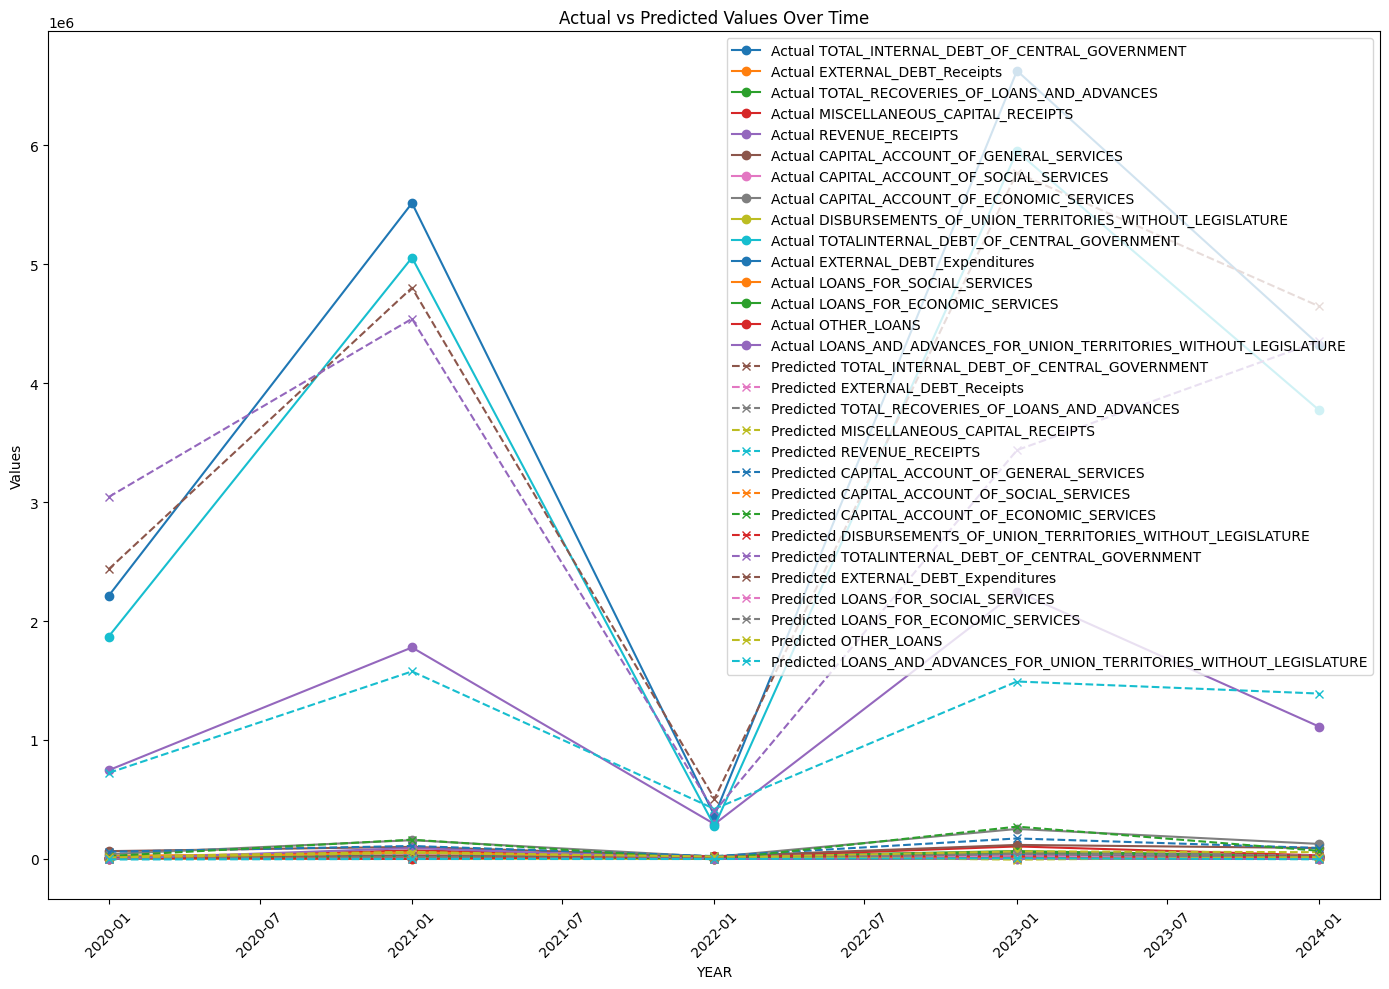

In [36]:
# Step 1: Plot each column from actual_df and predicted_df against Year
plt.figure(figsize=(14, 10))

# Plot actual values
for column in actual_df.columns:
    if column != 'YEAR':  # Skip the Year column
        plt.plot(actual_df['YEAR'], actual_df[column], label=f'Actual {column}', marker='o')

# Plot predicted values
for column in predicted_df.columns:
    if column != 'YEAR':  # Skip the Year column
        plt.plot(predicted_df['YEAR'], predicted_df[column], label=f'Predicted {column}', linestyle='--', marker='x')

# Step 2: Adding titles and legends
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('YEAR')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
print("Actual DataFrame Columns:", actual_df.columns)
print("Predicted DataFrame Columns:", predicted_df.columns)

Actual DataFrame Columns: Index(['YEAR', 'TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT',
       'EXTERNAL_DEBT_Receipts', 'TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES',
       'MISCELLANEOUS_CAPITAL_RECEIPTS', 'REVENUE_RECEIPTS',
       'CAPITAL_ACCOUNT_OF_GENERAL_SERVICES',
       'CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES',
       'CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES',
       'DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE',
       'TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT',
       'EXTERNAL_DEBT_Expenditures', 'LOANS_FOR_SOCIAL_SERVICES',
       'LOANS_FOR_ECONOMIC_SERVICES', 'OTHER_LOANS',
       'LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE'],
      dtype='object')
Predicted DataFrame Columns: Index(['YEAR', 'TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT',
       'EXTERNAL_DEBT_Receipts', 'TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES',
       'MISCELLANEOUS_CAPITAL_RECEIPTS', 'REVENUE_RECEIPTS',
       'CAPITAL_ACCOUNT_OF_GENERAL_SERVICES',
       'CAPITAL_ACCOUNT_OF_SOCIAL_SERVIC

In [38]:
# Clean up the actual data frame by dropping the 'index' column
if 'index' in actual_df.columns:
    actual_df.drop(columns=['index'], inplace=True)

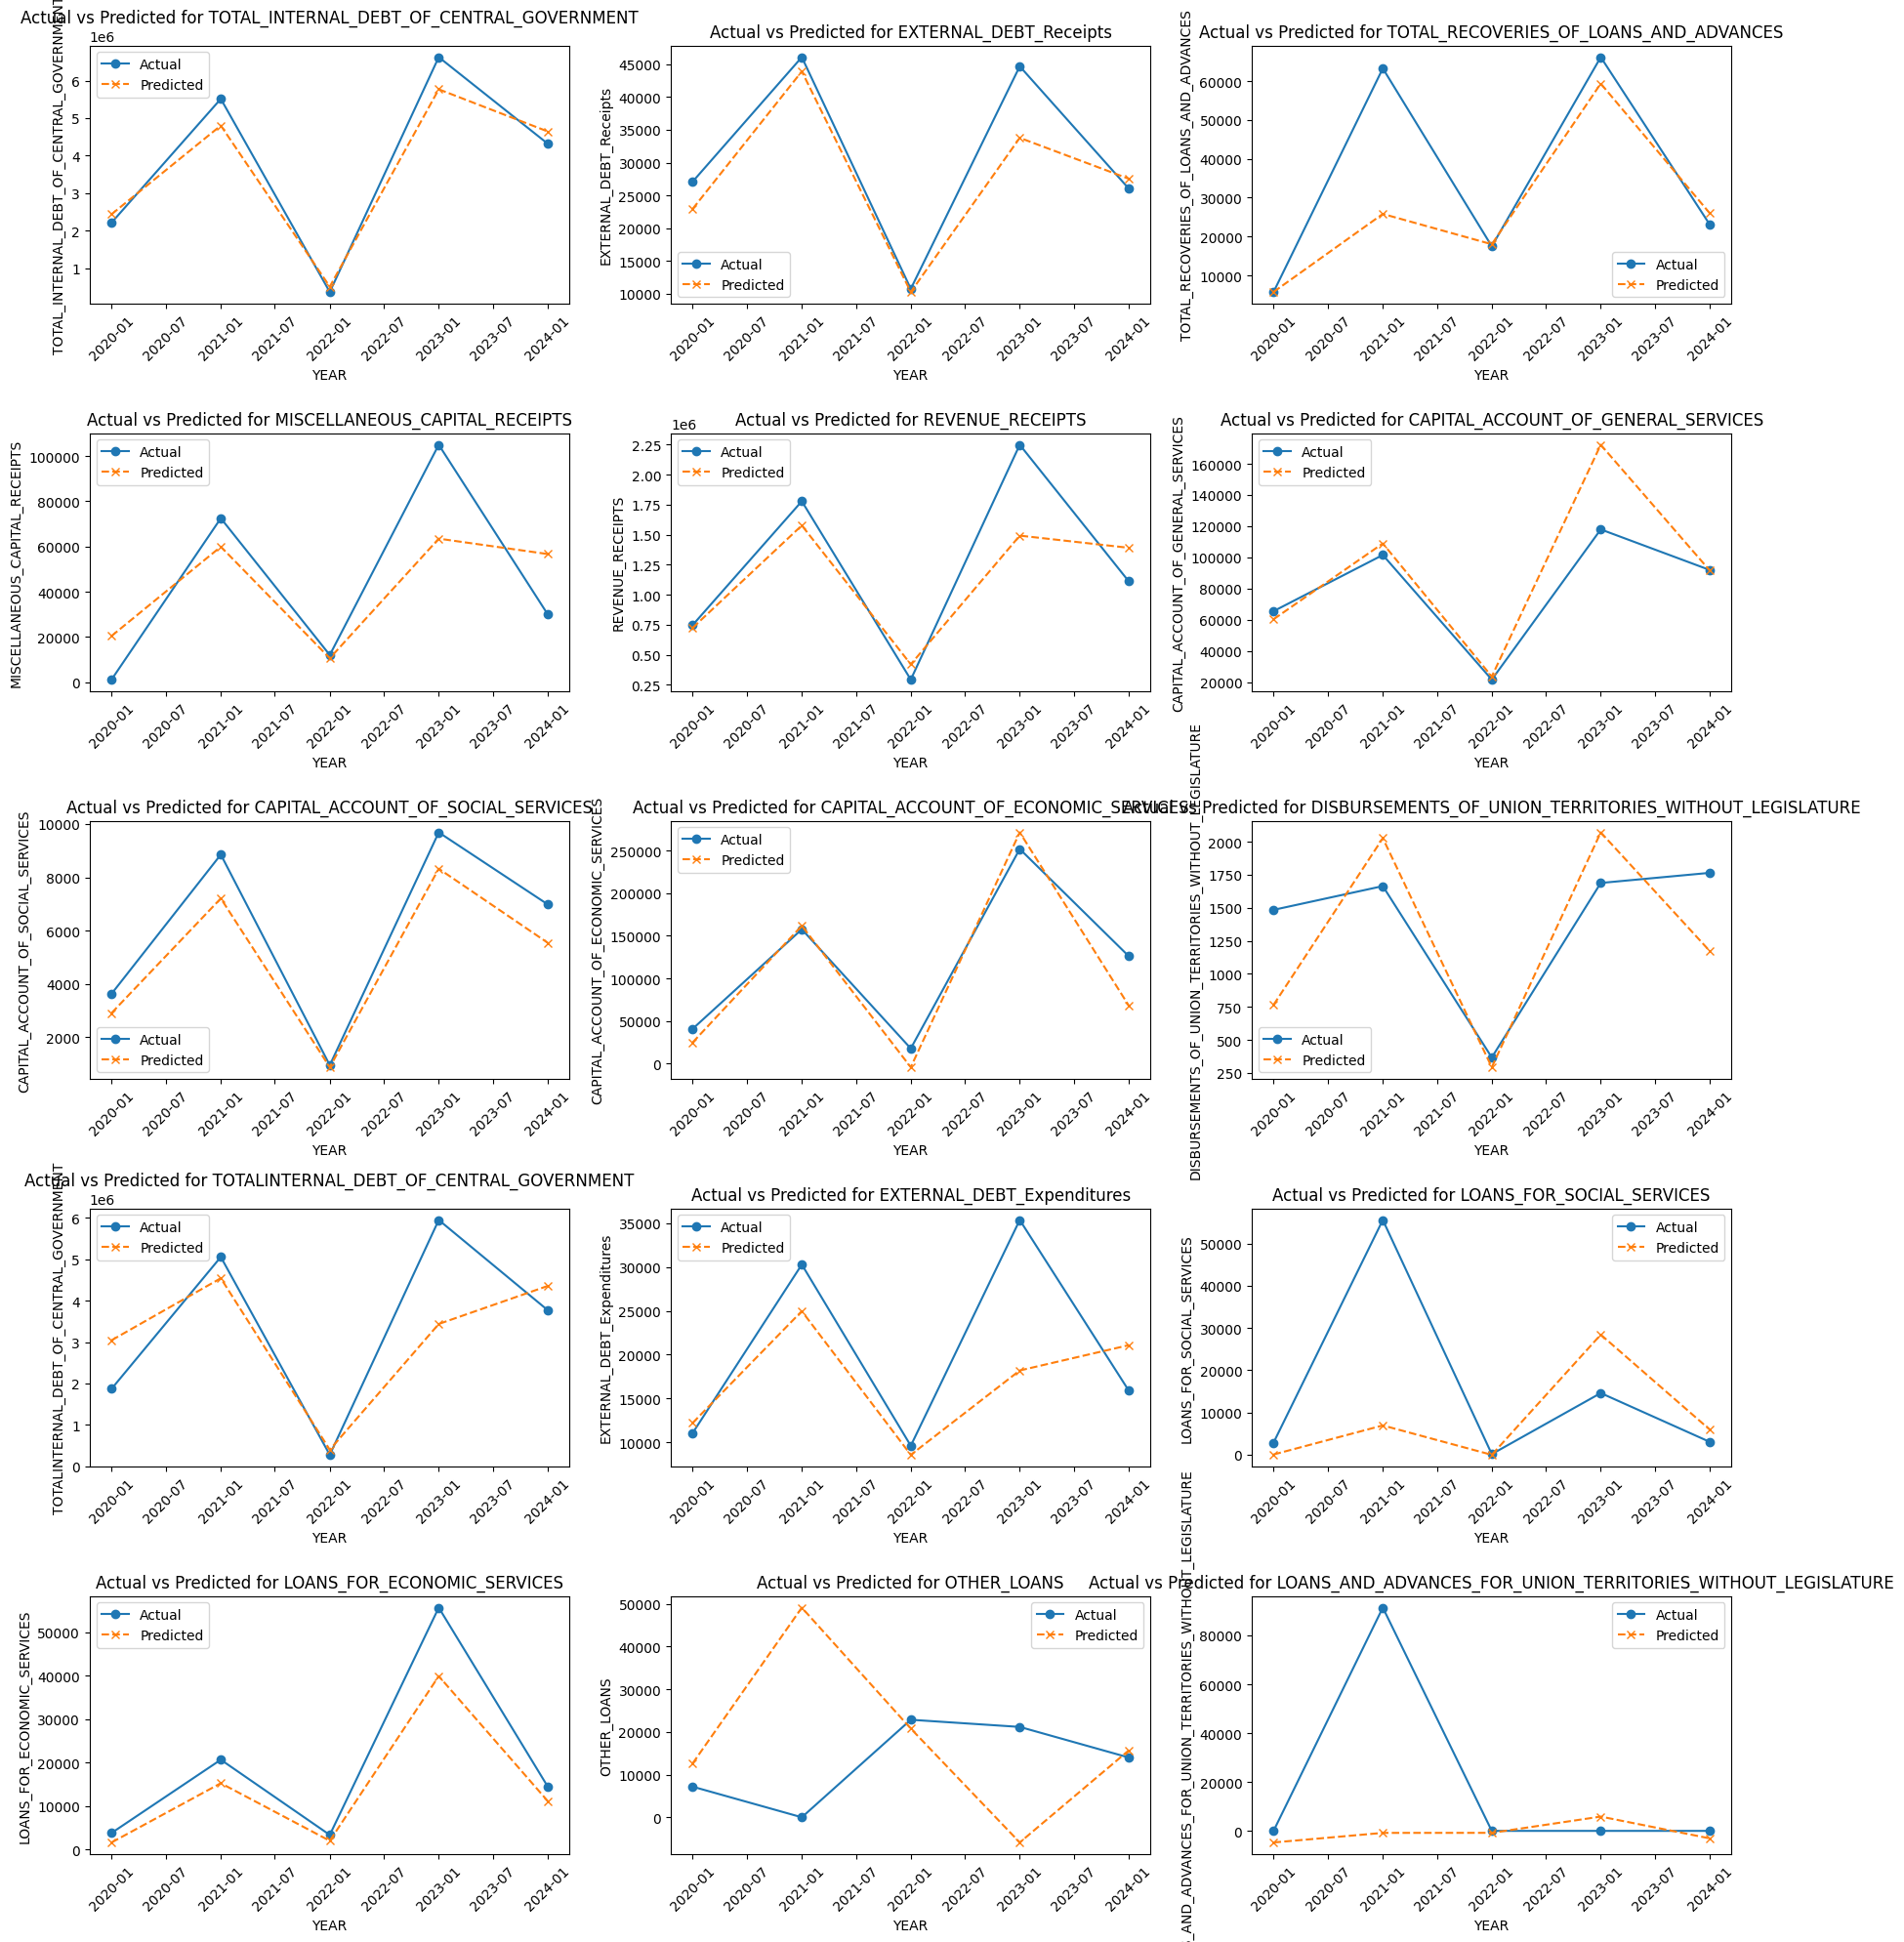

In [39]:
# Number of regions (excluding Year)
num_regions = len(actual_df.columns) - 1  # Excluding 'Year'

# Step 1: Set up the subplot arrangement
# Determine rows and columns based on the total number of regions
cols = 3  # Number of columns
rows = (num_regions // cols) + (num_regions % cols > 0)

plt.figure(figsize=(18, rows * 4))  # Adjust figure size according to your preference

# Step 2: Plot each column
for i, column in enumerate(actual_df.columns[1:]):  # Skip 'Year'
    plt.subplot(rows, cols, i + 1)  # Dynamic subplot specification
    plt.plot(actual_df['YEAR'], actual_df[column], label='Actual', marker='o')

    # Plot predicted values
    plt.plot(predicted_df['YEAR'], predicted_df[column], label='Predicted', linestyle='--', marker='x')

    # Title and labels
    plt.title(f'Actual vs Predicted for {column}')
    plt.xlabel('YEAR')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# LSTM model

In [40]:
from tensorflow.keras.layers import LSTM, Dense

In [41]:
# Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape with Input layer
model_LSTM.add(LSTM(50, activation='relu'))
model_LSTM.add(Dense(y_train.shape[1]))  # Output layer for each region's receipts/expenditures
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# Compile the model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model_LSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          13,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,965 (54.55 KB)

 Trainable params: 13,965 (54.55 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_LSTM.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1793
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0796 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0529
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 

In [46]:
# Save the trained LSTM model
model_LSTM.save('model_lstm.h5')

In [47]:
model_RNN.save('model_rnn.h5')

In [ ]:
# Saving model and scaler

In [48]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['CAPITAL_scaler.pkl']

In [ ]:
# Inference

In [50]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

In [52]:
# Load the saved scaler and model
scaler = joblib.load('scaler.pkl')
lstm_model = load_model('model_lstm.h5')
rnn_model = load_model('model_rnn.h5')

In [54]:
df_org.head()

,YEAR,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,...,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTAL_PUBLIC_DEBT_Receipts (B+C),TOTAL_CAPITAL_ACCOUNT_RECEIPTS (R+D+E),TOTAL_CAPITAL_EXPENDITURE_OUTSIDE_THE_REVENUE_ACCOUNT (G+H+I+J),TOTAL_PUBLIC_DEBT_Expenditures (K+L),TOTAL_LOANS_AND_ADVANCES (M+N+O+P),TOTALCAPITAL_EXPENDITURE (T+U+V)
0,1998-01-01,402835.71,9711.01,11559.92,5000,247314.97,11543.39,1050.55,15263.37,310.41,...,134.06,4878.84,31225.13,3.38,412546.72,429106.64,28167.72,359079.96,36241.41,423489.09
1,1999-01-01,593319.14,8329.83,13337.19,10000,279672.40,13564.50,1147.95,15625.54,327.30,...,165.05,5386.06,19192.05,2.18,601648.97,624986.16,30665.29,360893.44,24745.34,416304.07
2,2000-01-01,433331.56,8468.03,15839.00,10000,309448.97,19334.24,1069.56,13426.47,329.32,...,210.23,3801.04,22756.62,2.14,441799.59,467638.59,34159.59,354767.13,26770.03,415696.75
3,2001-01-01,363959.53,10763.35,17488.68,12000,292856.88,21706.77,952.78,17620.34,367.40,...,138.43,3329.10,22863.49,2.94,374722.88,404211.56,40647.29,285150.44,26333.96,352131.69
4,2002-01-01,423278.61,11183.82,20080.00,12000,314156.90,23199.91,1072.67,17683.52,326.60,...,242.75,2520.34,28767.90,5.12,434462.43,466542.43,42282.70,321154.89,31536.11,394973.70


In [55]:
RAW_coulmns = 16

In [56]:
# Keep only the first 11 columns (0-indexed, so 0 to 10)
df = df_org.iloc[:, :RAW_coulmns]
df.head()

,YEAR,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTALINTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Expenditures,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE
0,1998-01-01,402835.71,9711.01,11559.92,5000,247314.97,11543.39,1050.55,15263.37,310.41,351422.43,7657.53,134.06,4878.84,31225.13,3.38
1,1999-01-01,593319.14,8329.83,13337.19,10000,279672.40,13564.50,1147.95,15625.54,327.30,352737.85,8155.59,165.05,5386.06,19192.05,2.18
2,2000-01-01,433331.56,8468.03,15839.00,10000,309448.97,19334.24,1069.56,13426.47,329.32,345593.76,9173.37,210.23,3801.04,22756.62,2.14
3,2001-01-01,363959.53,10763.35,17488.68,12000,292856.88,21706.77,952.78,17620.34,367.40,275552.19,9598.25,138.43,3329.10,22863.49,2.94
4,2002-01-01,423278.61,11183.82,20080.00,12000,314156.90,23199.91,1072.67,17683.52,326.60,310591.43,10563.46,242.75,2520.34,28767.90,5.12


In [57]:

# Load dataset (Ensure Year column is datetime)
# df = pd.read_csv("your_data.csv")  # Change this to your actual file
df["YEAR"] = pd.to_datetime(df["YEAR"])

# Extract last available date
last_date = df["YEAR"].max()
print("Last Date in Dataset:", last_date)

Last Date in Dataset: 2024-01-01 00:00:00


In [58]:
# Extract numerical values (excluding "Year" column) and scale
data_values = df.drop(columns=["YEAR"]).values
scaled_data = scaler.transform(data_values)

In [59]:
# scaled_data

In [60]:
# Define sequence length and number of years to predict
seq_length = 3
num_years_to_predict = 1

In [61]:
# Get the last sequence from the scaled dataset
last_sequence = scaled_data[-seq_length:]  # Shape: (seq_length, features)
last_sequence

array([[8.13317213e-01, 8.45787271e-01, 2.87636533e-01, 3.09523810e-01,
        6.96999655e-01, 8.75930913e-01, 9.63428787e-01, 5.85721733e-01,
        9.49455279e-01, 7.90594640e-01, 6.88012393e-01, 3.59275950e-01,
        2.72331123e-01, 7.19084349e-01, 4.48737095e-05],
       [1.00000000e+00, 9.01066852e-01, 6.01170035e-01, 2.90476190e-01,
        8.39014246e-01, 9.48358370e-01, 1.00000000e+00, 8.92589073e-01,
        9.34584134e-01, 1.00000000e+00, 7.90900339e-01, 3.32680867e-01,
        5.36272706e-01, 8.39407906e-01, 7.44246889e-04],
       [8.81272434e-01, 1.00000000e+00, 1.00000000e+00, 2.38095238e-01,
        1.00000000e+00, 1.00000000e+00, 7.78516818e-01, 1.00000000e+00,
        9.25558421e-01, 8.77221660e-01, 1.00000000e+00, 3.83823302e-01,
        9.95857405e-01, 1.00000000e+00, 4.19295564e-04]])

In [62]:
last_sequence = np.reshape(last_sequence, (1, seq_length, last_sequence.shape[1]))
last_sequence

array([[[8.13317213e-01, 8.45787271e-01, 2.87636533e-01, 3.09523810e-01,
         6.96999655e-01, 8.75930913e-01, 9.63428787e-01, 5.85721733e-01,
         9.49455279e-01, 7.90594640e-01, 6.88012393e-01, 3.59275950e-01,
         2.72331123e-01, 7.19084349e-01, 4.48737095e-05],
        [1.00000000e+00, 9.01066852e-01, 6.01170035e-01, 2.90476190e-01,
         8.39014246e-01, 9.48358370e-01, 1.00000000e+00, 8.92589073e-01,
         9.34584134e-01, 1.00000000e+00, 7.90900339e-01, 3.32680867e-01,
         5.36272706e-01, 8.39407906e-01, 7.44246889e-04],
        [8.81272434e-01, 1.00000000e+00, 1.00000000e+00, 2.38095238e-01,
         1.00000000e+00, 1.00000000e+00, 7.78516818e-01, 1.00000000e+00,
         9.25558421e-01, 8.77221660e-01, 1.00000000e+00, 3.83823302e-01,
         9.95857405e-01, 1.00000000e+00, 4.19295564e-04]]])

In [63]:
# Store predictions
predictions_lstm = []
predictions_rnn = []
# Generate predictions for the next 'num_years_to_predict' years
for i in range(num_years_to_predict):
    next_prediction = lstm_model.predict(last_sequence)  # Predict next year
    predictions_lstm.append(next_prediction[0])  # Store prediction

    # Update last_sequence by removing the first value and appending the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)

for i in range(num_years_to_predict):
    next_prediction = rnn_model.predict(last_sequence)  # Predict next year
    predictions_rnn.append(next_prediction[0])  # Store prediction

    # Update last_sequence by removing the first value and appending the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)

# Convert predictions back to original scale
predictions_lstm = scaler.inverse_transform(predictions_lstm)
print('LST predictions')
print(predictions_lstm)

# Convert predictions back to original scale

predictions_rnn = scaler.inverse_transform(predictions_rnn)
print('RNN predictions')
print(predictions_rnn)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
LST predictions
[[9.33523016e+06 1.03770013e+05 9.04121512e+04 4.85721356e+04
  4.00704671e+06 2.28442308e+05 9.83000232e+03 7.75371772e+05
  6.47420497e+03 7.18606315e+06 6.43988766e+04 2.69341169e+04
  6.68051664e+04 2.15434700e+05 3.10012779e+03]]
RNN predictions
[[8.90620854e+06 1.22508820e+05 6.81737120e+04 5.86987880e+04
  4.52644466e+06 2.12311788e+05 9.44349210e+03 8.49411580e+05
  8.19581666e+03 7.28061969e+06 6.39165958e+04 2.12753191e+04
  6.94838467e+04 2.00744916e+05 2.89523491e+03]]


As we know form the loss while training, LOSS OF RNN IS LESS THAN LSTM

In [64]:
# Generate next year dates
future_dates = [last_date.replace(year=last_date.year + i ) for i in range(1, num_years_to_predict + 1)]

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions_rnn, columns=df.columns[1:], index=future_dates)
predictions_df.reset_index(inplace=True)
predictions_df.rename(columns={"index": "YEAR"}, inplace=True)

# Append predictions to the original DataFrame
df_extended = pd.concat([df_org, predictions_df])

In [65]:

df_extended

,YEAR,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,...,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTAL_PUBLIC_DEBT_Receipts (B+C),TOTAL_CAPITAL_ACCOUNT_RECEIPTS (R+D+E),TOTAL_CAPITAL_EXPENDITURE_OUTSIDE_THE_REVENUE_ACCOUNT (G+H+I+J),TOTAL_PUBLIC_DEBT_Expenditures (K+L),TOTAL_LOANS_AND_ADVANCES (M+N+O+P),TOTALCAPITAL_EXPENDITURE (T+U+V)
0,1998-01-01,4.028357e+05,9711.010000,11559.920000,5000.000000,2.473150e+05,11543.390000,1050.550000,15263.370000,310.410000,...,134.060000,4878.840000,31225.13000,3.380000,412546.72,429106.64,28167.72,359079.96,36241.41,423489.09
1,1999-01-01,5.933191e+05,8329.830000,13337.190000,10000.000000,2.796724e+05,13564.500000,1147.950000,15625.540000,327.300000,...,165.050000,5386.060000,19192.05000,2.180000,601648.97,624986.16,30665.29,360893.44,24745.34,416304.07
2,2000-01-01,4.333316e+05,8468.030000,15839.000000,10000.000000,3.094490e+05,19334.240000,1069.560000,13426.470000,329.320000,...,210.230000,3801.040000,22756.62000,2.140000,441799.59,467638.59,34159.59,354767.13,26770.03,415696.75
3,2001-01-01,3.639595e+05,10763.350000,17488.680000,12000.000000,2.928569e+05,21706.770000,952.780000,17620.340000,367.400000,...,138.430000,3329.100000,22863.49000,2.940000,374722.88,404211.56,40647.29,285150.44,26333.96,352131.69
4,2002-01-01,4.232786e+05,11183.820000,20080.000000,12000.000000,3.141569e+05,23199.910000,1072.670000,17683.520000,326.600000,...,242.750000,2520.340000,28767.90000,5.120000,434462.43,466542.43,42282.70,321154.89,31536.11,394973.70
5,2003-01-01,4.789335e+05,12902.400000,20523.100000,13200.000000,3.241723e+05,23189.970000,1051.040000,18376.530000,329.440000,...,865.790000,4519.420000,27395.21000,5.000000,491835.92,525559.02,42946.98,367078.53,32785.42,442810.93
6,2004-01-01,4.928573e+05,14546.190000,29625.000000,4000.000000,3.803426e+05,36184.990000,1133.410000,23093.660000,306.150000,...,454.050000,12302.430000,30382.99000,3.110000,507403.45,541028.45,60718.21,342119.51,43142.58,445980.30
7,2005-01-01,7.306510e+05,16384.480000,13525.000000,0.000000,4.274260e+05,37716.910000,762.570000,23710.050000,347.640000,...,580.580000,4322.250000,2270.32000,3.520000,747035.49,760560.49,62537.17,601477.12,7176.67,671640.96
8,2006-01-01,1.258154e+06,16064.750000,9530.000000,3840.000000,4.901543e+05,40645.180000,1164.830000,24194.580000,932.800000,...,533.320000,3928.510000,5926.23000,3.340000,1274219.03,1287589.03,66937.39,1098307.66,10391.40,1175636.45
9,2007-01-01,1.733533e+06,17451.520000,3030.000000,41651.000000,5.836475e+05,48596.300000,1850.250000,63724.950000,990.730000,...,901.650000,2998.740000,5124.80000,3.140000,1750984.42,1795665.42,115162.23,1611645.92,9028.33,1735836.48


In [66]:

# Save the updated DataFrame
df_extended.to_excel("predicted_dataset.xlsx", index=False, engine='openpyxl')


In [67]:

# Print the updated DataFrame
df_extended.tail(num_years_to_predict + 5) # Show last few rows including predictions

,YEAR,TOTAL_INTERNAL_DEBT_OF_CENTRAL_GOVERNMENT,EXTERNAL_DEBT_Receipts,TOTAL_RECOVERIES_OF_LOANS_AND_ADVANCES,MISCELLANEOUS_CAPITAL_RECEIPTS,REVENUE_RECEIPTS,CAPITAL_ACCOUNT_OF_GENERAL_SERVICES,CAPITAL_ACCOUNT_OF_SOCIAL_SERVICES,CAPITAL_ACCOUNT_OF_ECONOMIC_SERVICES,DISBURSEMENTS_OF_UNION_TERRITORIES_WITHOUT_LEGISLATURE,...,LOANS_FOR_SOCIAL_SERVICES,LOANS_FOR_ECONOMIC_SERVICES,OTHER_LOANS,LOANS_AND_ADVANCES_FOR_UNION_TERRITORIES_WITHOUT_LEGISLATURE,TOTAL_PUBLIC_DEBT_Receipts (B+C),TOTAL_CAPITAL_ACCOUNT_RECEIPTS (R+D+E),TOTAL_CAPITAL_EXPENDITURE_OUTSIDE_THE_REVENUE_ACCOUNT (G+H+I+J),TOTAL_PUBLIC_DEBT_Expenditures (K+L),TOTAL_LOANS_AND_ADVANCES (M+N+O+P),TOTALCAPITAL_EXPENDITURE (T+U+V)
22,2020-01-01,7.649978e+06,57557.000000,66341.680000,210000.000000,2.331445e+06,127902.590000,8824.430000,249058.530000,5536.470000,...,16355.000000,55994.020000,55994.02000,0.100000,7707535.15,7983876.83,391322.02,6890921.56,98685.28,7380928.86
23,2021-01-01,8.301756e+06,86022.000000,64375.010000,175000.000000,2.105708e+06,150935.400000,8110.890000,370035.300000,5780.510000,...,19837.090000,57504.420000,57984.78000,4.150000,8387778.14,8627153.15,534862.10,6944151.48,164830.44,7643844.02
24,2022-01-01,8.628962e+06,80242.030000,24666.020000,65000.000000,2.517456e+06,173418.760000,11878.120000,420388.320000,5503.810000,...,20060.000000,17407.580000,133340.60000,4.200000,8709204.53,8798870.55,611189.01,7075067.16,170812.38,7857068.55
25,2023-01-01,1.052605e+07,84942.120000,48250.010000,61000.000000,2.980001e+06,186803.630000,12300.060000,633601.000000,5422.400000,...,18585.000000,31951.590000,155647.88000,68.100000,10610991.96,10720241.97,838127.09,8870348.71,206252.57,9914728.37
26,2024-01-01,9.319530e+06,93353.810000,78250.000000,50000.000000,3.504335e+06,196347.200000,9744.700000,708230.550000,5372.990000,...,21421.430000,57276.150000,185420.71000,38.410000,9412883.40,9541133.40,919695.44,7830953.83,264156.70,9014805.97
0,2025-01-01,8.906209e+06,122508.819751,68173.711973,58698.787987,4.526445e+06,212311.787709,9443.492101,849411.579567,8195.816655,...,21275.319089,69483.846714,200744.91639,2895.234913,NaN,NaN,NaN,NaN,NaN,NaN
